# Benchmark ComBind

Explore performance as a function of number of ligands and temperature.

The raw data for this notebook should be prepared by running 1_dock/score_all.py, followed by visualization/extract_data/combind_sweep.py

In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
rmsds = {}
with open('../../combind_sherlock/bpp_outputs/all_best_affinity/rmsds.csv') as fp:
    for line in fp:
        t, n, protein, ligand, best, glide, combind = line.strip().split(',')
        t = float(t.split('=')[1])
        n = int(n.split('=')[1])
        best, glide, combind = float(best), float(glide), float(combind)
        #if best > 2: continue
        if (t, n) not in rmsds: rmsds[(t,n)] = {}
        if protein not in rmsds[(t, n)]: rmsds[(t, n)][protein] = {}
        rmsds[(t, n)][protein][ligand] = (best, glide, combind)

IOError: [Errno 2] No such file or directory: '../../combind_sherlock/bpp_outputs/all_best_affinity/rmsds.csv'

1 0.001 493 3.52288087473
1 0.003 500 3.5728785997
1 0.01 497 3.593617255
1 0.03 500 3.54348260342
1 0.1 500 3.48457425482
1 0.3 497 3.48087084442
1 1.0 500 3.42948765278
3 0.001 486 3.45648869079
3 0.003 483 3.47125453964
3 0.01 482 3.38172919485
3 0.03 486 3.39064778817
3 0.1 486 3.33738472506
3 0.3 483 3.29032510816
3 1.0 486 3.45579196791
10 0.001 486 3.45308069966
10 0.003 486 3.44902892928
10 0.01 479 3.31690734565
10 0.03 486 3.29408235543
10 0.1 486 3.26700532351
10 0.3 486 3.45068770451
10 1.0 486 3.70777496
30 0.001 483 3.45114477587
30 0.003 483 3.375897888
30 0.01 486 3.37031757795
30 0.03 486 3.25447792781
30 0.1 477 3.32435637786
30 0.3 483 3.62014805991
30 1.0 483 3.82328661633


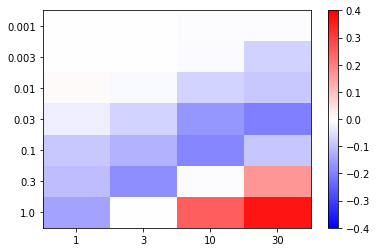

In [41]:
from scipy.stats import ttest_rel

N = sorted(set([k[1] for k in rmsds.keys()]))
T = sorted(set([k[0] for k in rmsds.keys()]))

C = np.zeros((len(N), len(T)))
G = np.zeros((len(N), len(T)))

for i, n in enumerate(N):
    for j, t in enumerate(T):
        c, g = [], []
        for prot, ligs in rmsds[(t, n)].items():
            for lig, (best, glide, combind) in ligs.items():
                c += [combind]
                g += [glide]
        C[i, j] = sum(c) / float(len(c))
        G[i, j] = sum(g) / float(len(g))
        print n, t, len(c), C[i, j]

plt.imshow((C-G).T, aspect = 'auto', cmap = 'bwr', vmin = -.4, vmax = .4)
plt.colorbar()
plt.xticks(range(len(N)), N)
plt.yticks(range(len(T)), T)
plt.show()

MGLUR5 6FFI_lig
ERA 1X7R_lig
P18031 1NWL_lig
P18031 1NNY_lig
P18031 1NZ7_lig
P18031 1BZC_lig
P18031 1L8G_lig
PLK1 2YAC_lig
JAK2 3E63_lig
JAK2 3KCK_lig
JAK2 2XA4_lig
JAK2 3E62_lig
P00734 1C1V_lig
GCR 5G5W_lig
A2AR 3REY_lig
A2AR 5IU7_lig
SMO 5L7I_lig
P00749 1EJN_lig
Q9Y233 3UUO_lig
Q9Y233 4LM2_lig
Q9Y233 4MRW_lig
MR 5L7E_lig
STRANSP 6AWO_lig
Ttest_relResult(statistic=3.390714354951367, pvalue=0.00075403023369220365)
Glide Average: 3.45658782578 0.487654320988
ComBind Average: 3.25447792781 0.502057613169


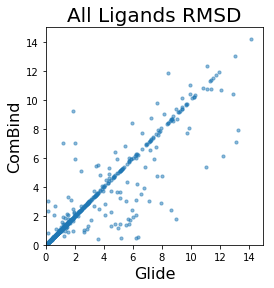

In [42]:
from scipy.stats import ttest_rel
x, y = [], []
for prot, ligs in rmsds[(.03, 30)].items():
    for lig, (best, glide, combind) in ligs.items():
        x += [glide]
        y += [combind]
        if combind > glide+1:
            print prot, lig

print ttest_rel(x, y)
f, ax = plt.subplots()
plt.scatter(x, y, alpha = 0.5, s = 10)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.title('All Ligands RMSD', fontsize = 20)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xticks(range(0, 15, 2), range(0, 15, 2))
ax.set_aspect('equal', 'box')
print 'Glide Average:', sum(x) / float(len(x)), sum(np.array(x) <= 2.0) /  float(len(x))
print 'ComBind Average:', sum(y) / float(len(y)), sum(np.array(y) <= 2.0) /  float(len(y))
# 3.67435312 with best_mcss.txt
# 3.64923135235 with best_affinity.txt

# 3.48206150403 with best_affinity.txt, t = 0.05 (Only improvements!!!)

In [43]:
x, y = np.array(x), np.array(y)

In [44]:
tol = 1
sum((y - x) > tol), sum((y - x) < -tol), sum(((y-x)<tol)*((y - x)>-tol))

(23, 50, 413)

3.32227704766 3.16261780208


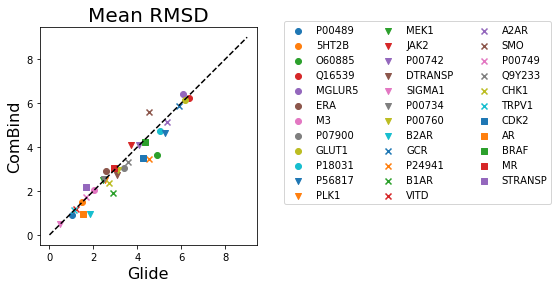

In [48]:
x, y, label = [], [], []
for prot, ligs in rmsds[(0.03, 30)].items():
    _x, _y = [], []
    for lig, (best, glide, combind) in ligs.items():
        _x += [glide]
        _y += [combind]
    label += [prot]
    x += [sum(_x)/float(len(_x))]
    y += [sum(_y)/float(len(_y))]
    
markers = ['o', 'v', 'x', 's']
f, ax = plt.subplots()
for i, (_x, _y, _label) in enumerate(zip(x, y, label)):
    plt.scatter(_x, _y, marker = markers[i/10], label = _label)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.title('Mean RMSD', fontsize = 20)
#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.plot(range(10), linestyle='--', c = 'k')
ax.set_aspect('equal', 'box')
print sum(x) / float(len(x)), sum(y) / float(len(y))
plt.legend(bbox_to_anchor=(1.1, 1.05), ncol=3)
plt.show()

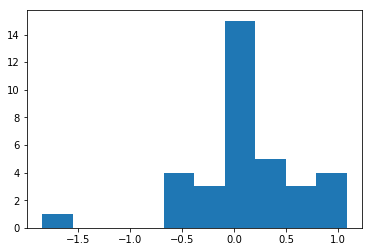

In [35]:
plt.hist(np.array(x) - np.array(y))
plt.show()

P00489 20
5HT2B 2
O60885 17
Q16539 11
MGLUR5 5
ERA 18
M3 2
P07900 20
GLUT1 3
P18031 20
P56817 20
PLK1 12
MEK1 20
JAK2 20
P00742 20
DTRANSP 9
SIGMA1 2
P00734 20
P00760 20
B2AR 8
GCR 18
P24941 13
B1AR 12
VITD 20
A2AR 18
SMO 7
P00749 20
Q9Y233 20
CHK1 20
TRPV1 2
CDK2 19
AR 11
BRAF 19
MR 13
STRANSP 5
0.514183962138 0.528977999739


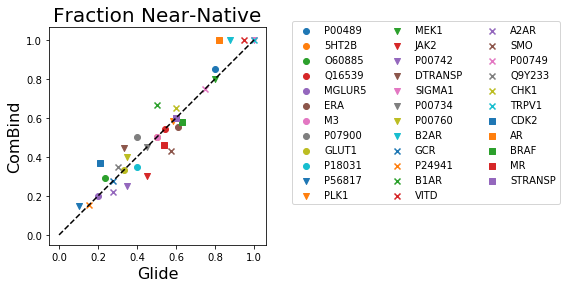

In [55]:
x, y = [], []
for prot, ligs in rmsds[(0.03, 30)].items():
    _x, _y = [], []
    for lig, (best, glide, combind) in ligs.items():
        _x += [glide <= 2.0]
        _y += [combind <= 2.0]
    label += [prot]
    print prot, len(_x)
    x += [sum(_x)/float(len(_x))]
    y += [sum(_y)/float(len(_y))]
    
markers = ['o', 'v', 'x', 's']
f, ax = plt.subplots()
for i, (_x, _y, _label) in enumerate(zip(x, y, label)):
    plt.scatter(_x, _y, marker = markers[i/10], label = _label)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.plot(range(2), linestyle='--', c = 'k')
plt.title('Fraction Near-Native', fontsize = 20)
ax.set_aspect('equal', 'box')
print sum(x) / float(len(x)), sum(y) / float(len(y))
plt.legend(bbox_to_anchor=(1.1, 1.05), ncol = 3)
plt.show()

(array([  3.,   1.,   2.,   7.,   0.,  14.,   1.,   4.,   1.,   2.]),
 array([-0.18181818, -0.14863636, -0.11545455, -0.08227273, -0.04909091,
        -0.01590909,  0.01727273,  0.05045455,  0.08363636,  0.11681818,
         0.15      ]),
 <a list of 10 Patch objects>)

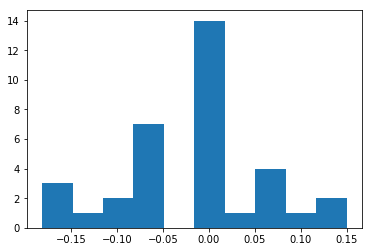

In [56]:
plt.hist(np.array(x) - np.array(y))